In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#importing the data
df=pd.read_csv(r"S:\ITM\ML Projects\Salary_Data.csv")

In [3]:
#checking the file
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#checking the shape of the data frame
df.shape

(30, 2)

In [5]:
df.size

60

In [6]:
#checking the data types
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
#Calculating various statistical measures for the data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Min experience is 1.1 years with a salary of 27414.42 and max experience is 10.5 years  with a salary of 122391

In [8]:
df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [9]:
#Checking the data for any null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


C:\Users\Shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


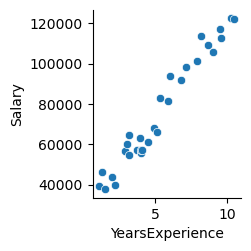

In [10]:
 #creating pairplot for the data
sns.pairplot(y_vars="Salary", x_vars='YearsExperience',data=df)
plt.show()

Salary is showing linear relationship with years of experience

In [11]:
#checking the correlation of the variables
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
From above we can say that there is high positive correlation between the variables

In [12]:
#creation of x and y variables

x=df["YearsExperience"]
y=df['Salary']

In [13]:
# Splitting the data into test and train
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [14]:
x_train.shape

(21,)

In [15]:
x_test.shape

(9,)

<Axes: >

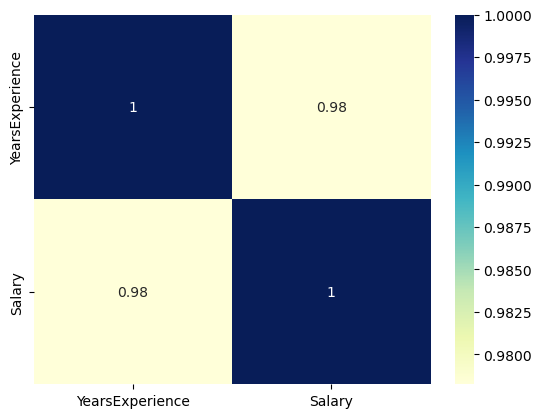

In [38]:
sns.heatmap(data = df.corr(), annot = True, cmap='YlGnBu')

In [22]:
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     427.6
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.74e-14
Time:                        19:40:29   Log-Likelihood:                -210.19
No. Observations:                  21   AIC:                             424.4
Df Residuals:                      19   BIC:                             426.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.592e+04   2507.522     

Linear Regression equation is :

Salary = 25200 + YearsExperience x 9731.2038

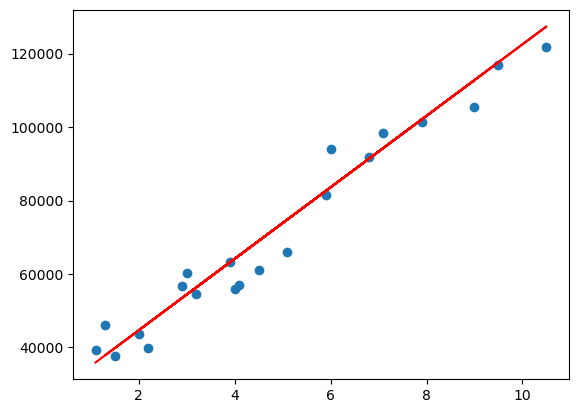

In [30]:
# line fitting:
plt.scatter(x_train,y_train)
plt.plot(x_train, 25200 + x_train * 9731.2038,'r')
plt.show()

The data points appear to show a positive correlation, which means that as the values on the x-axis increase, the values on the y-axis also increase.

In [33]:
y_train_pred = model.predict(x_train_sm)
y_train_pred.head()

0     36191.428231
4     46464.418127
16    73547.755126
5     53001.775334
13    64208.673403
dtype: float64

In [34]:
residual = (y_train - y_train_pred)
residual.head()

0     3151.571769
4    -6573.418127
16   -7518.755126
5     3640.224666
13   -7127.673403
dtype: float64

C:\Users\Shiva\AppData\Local\Temp\ipykernel_15028\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

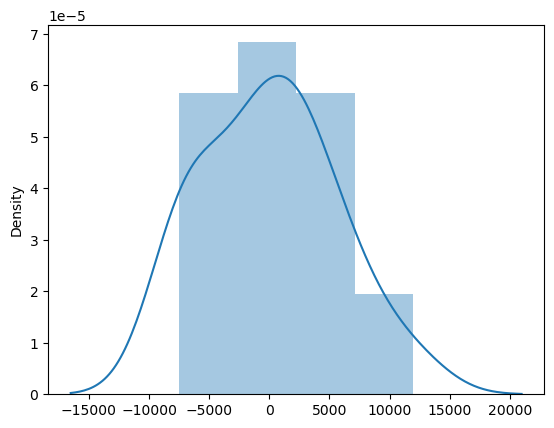

In [35]:
sns.distplot(residual)

In [39]:
x_test_sm = sm.add_constant(x_test)

In [42]:
y_pred = model.predict(x_test_sm)

In [43]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

6146.923007994573

R_2 Score

In [44]:
r2_score(y_test,y_pred)

0.9414466227178215

In [ ]:
Since R2 value is 0.94 so our model is predicting with accuracy of 94%.

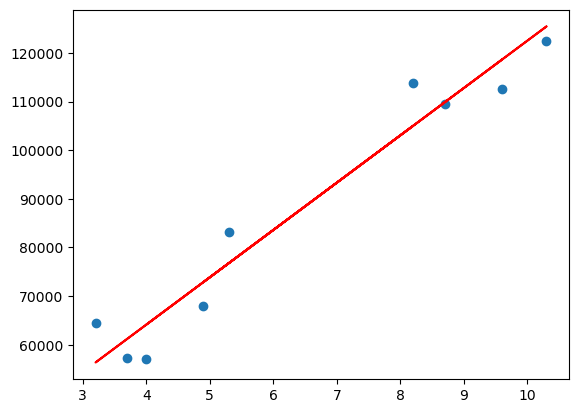

In [46]:
# Let us show the line fitting:
plt.scatter(x_test,y_test)
plt.plot(x_test, 25200 + x_test * 9731.2038,'r')
plt.show()